In [1]:
import pandas as pd
import numpy as np
import os
import sys
import scanpy as sc
import scipy
import time
import gget
from sklearn.decomposition import PCA
from kneed import KneeLocator
from importlib import reload

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import matplotlib.patheffects as pe

"""WARNING: disabling future warnings"""
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # and to omit tensorflow logging

""" Increase scanpy output"""
sc.settings.verbosity = 3

# local 
import utils as ut
reload(ut)

<module 'utils' from '/home/cstansbu/git_repositories/MC3R/notebooks/utils.py'>

In [2]:
fullpath = "/nfs/turbo/umms-indikar/shared/projects/MC3R/processed_data/all_subclustered.h5ad"
raw = sc.read(fullpath)

pdf = raw.copy()
pdf

AnnData object with n_obs × n_vars = 33647 × 25060
    obs: 'batch', 'reference_embedding_C7_named', 'reference_embedding_C25_named', 'C25_named', 'C7_named', 'reference_embedding_C7_named_clean', 'reference_embedding_C25_named_clean', 'C25_named_clean', 'C7_named_clean', 'UMAP1', 'UMAP2', 'Diet', 'Sex', 'broad_type', 'n_genes', 'color', 'leiden', 'cluster_num', 'Cluster', 'cluster_cat', 'U1', 'U2', 'cell_type', 'neuron_clusters', 'neuron_cluster_num', 'neuron_cluster_name', 'neuron_cluster_cat', 'NU1', 'NU2'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Cluster', 'Cluster_colors', 'batch_colors', 'hvg', 'leiden', 'log1p', 'neighbors', 'neuron_clusters_colors', 'neuron_clusters_sizes', 'neuron_neighbors', 'paga', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances', 'neuron_neighbors_connectivities', 'neuron_neighbors_distances'

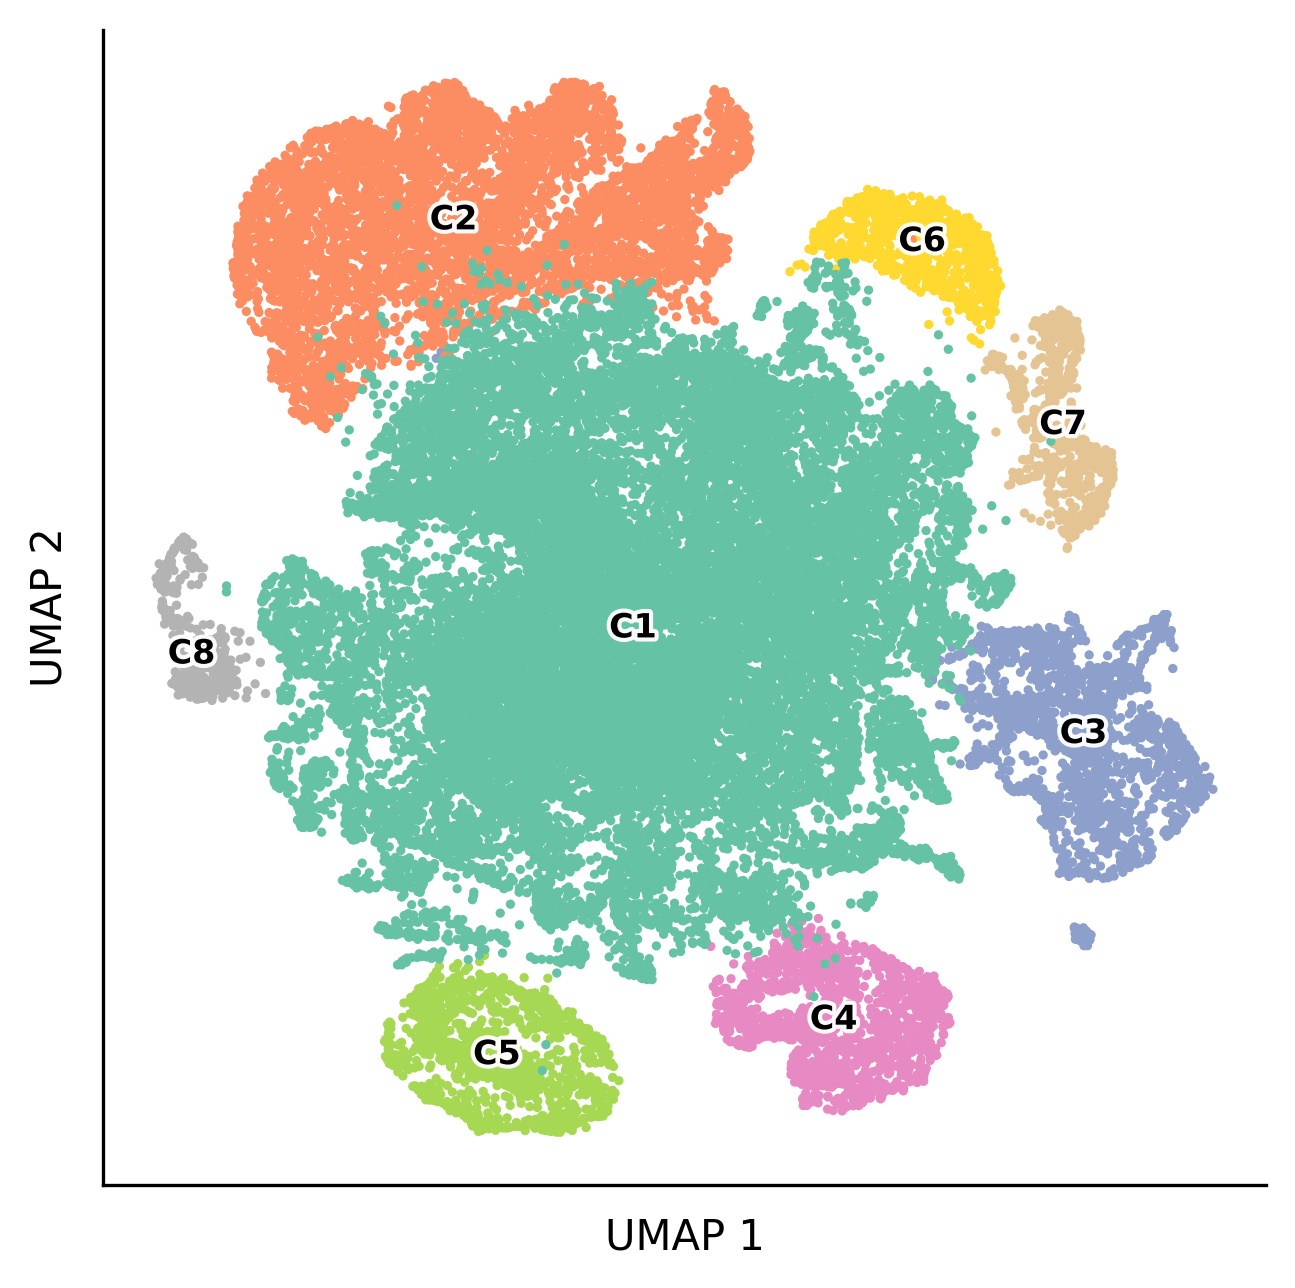

In [3]:
color_map = "Set2"

""" UMAP PLOT """
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 5, 5

# sort the data frame
pdx = pdf.obs.copy()
pdx = pdx.sort_values(by='cell_type')
pdx = pdx.reset_index()

hue_order = sorted(pdx['neuron_cluster_name'].unique())
order = np.argsort(pdx['neuron_cluster_name'])[::-1]

sns.scatterplot(data=pdx.iloc[order],
                x='NU1',
                y='NU2',
                hue='neuron_cluster_name',
                hue_order=hue_order,
                palette=color_map,
                s=5,
                alpha=1.0,
                ec='none'
        )

sns.despine()
plt.xticks([])
plt.yticks([])

plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")

# label on data
ax = plt.gca()

all_pos = (
        pdx.groupby('neuron_cluster_name')[['NU1', 'NU2']]
        .median()
        .sort_index()
    )

for label, x_pos, y_pos in all_pos.itertuples():
    ax.text(
        x_pos,
        y_pos,
        label,
        weight='bold',
        path_effects=[pe.withStroke(linewidth=2, foreground="w", alpha=0.95,)],
        verticalalignment="center",
        horizontalalignment="center",
        fontsize='8',
    )

plt.gca().legend().remove()


# outpath = "/nfs/turbo/umms-indikar/shared/projects/MC3R/analysis_files/figures/neuron_cluster_umap.png"
# plt.savefig(outpath)
# print(f"saved: {outpath}")

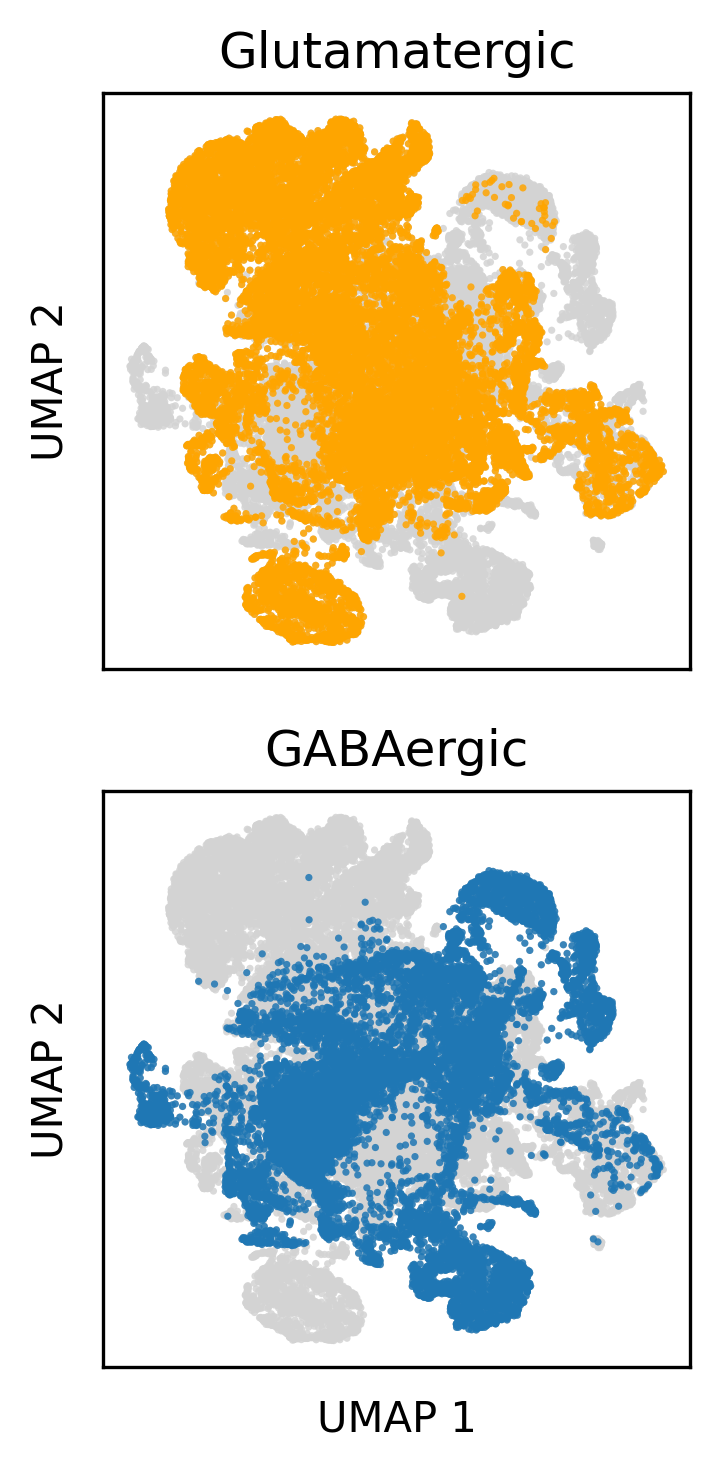

In [4]:
""" UMAP PLOT """
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 2.5, 5

fig, axs = plt.subplots(2, 1)

# sort the data frame
pdx = pdf.obs.copy()

sns.scatterplot(data=pdx,
                x='NU1',
                y='NU2',
                color='lightgrey',
                s=3,
                alpha=0.85,
                ec='none',
                ax=axs[0],
                zorder=0,
                
        )

sns.scatterplot(data=pdx[pdx['broad_type'] == ' GLU'],
                x='NU1',
                y='NU2',
                color='orange',
                s=3,
                alpha=0.85,
                ec='none',
                ax=axs[0],
                zorder=1,
        )

axs[0].set_yticks([])
axs[0].set_xticks([])
axs[0].set_ylabel("UMAP 2")
axs[0].set_xlabel("")
axs[0].set_title("Glutamatergic")

sns.scatterplot(data=pdx,
                x='NU1',
                y='NU2',
                color='lightgrey',
                s=3,
                alpha=0.85,
                ec='none',
                ax=axs[1],
                zorder=0,
                
        )

sns.scatterplot(data=pdx[pdx['broad_type'] == ' GABA'],
                x='NU1',
                y='NU2',
                color='C0',
                s=3,
                alpha=0.85,
                ec='none',
                ax=axs[1],
                zorder=1,
        )

axs[1].set_yticks([])
axs[1].set_xticks([])
axs[1].set_ylabel("UMAP 2")
axs[1].set_xlabel("UMAP 1")
axs[1].set_title("GABAergic")

plt.tight_layout()

In [5]:
pdf.obs.columns

Index(['batch', 'reference_embedding_C7_named',
       'reference_embedding_C25_named', 'C25_named', 'C7_named',
       'reference_embedding_C7_named_clean',
       'reference_embedding_C25_named_clean', 'C25_named_clean',
       'C7_named_clean', 'UMAP1', 'UMAP2', 'Diet', 'Sex', 'broad_type',
       'n_genes', 'color', 'leiden', 'cluster_num', 'Cluster', 'cluster_cat',
       'U1', 'U2', 'cell_type', 'neuron_clusters', 'neuron_cluster_num',
       'neuron_cluster_name', 'neuron_cluster_cat', 'NU1', 'NU2'],
      dtype='object')

In [6]:
# plot gaba and gluta

In [7]:
# break

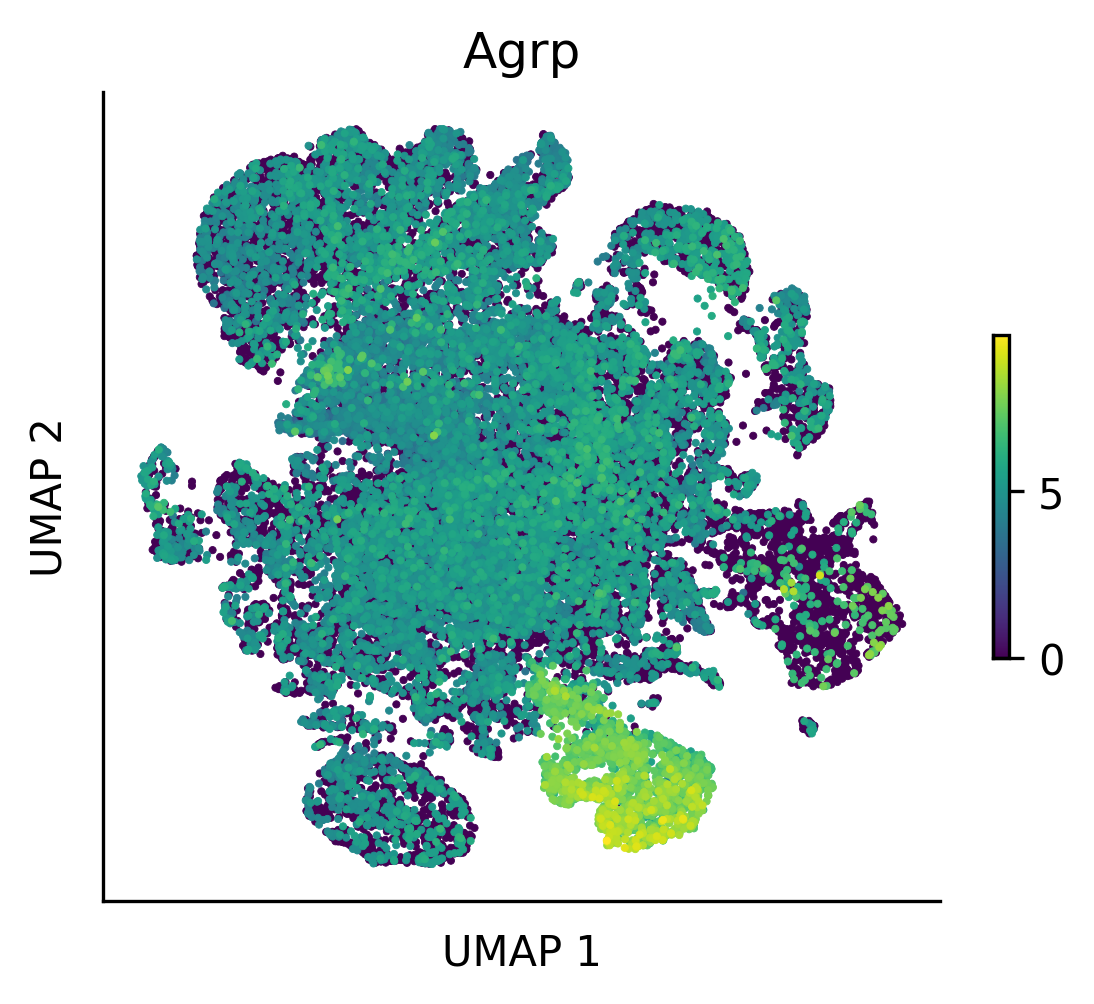

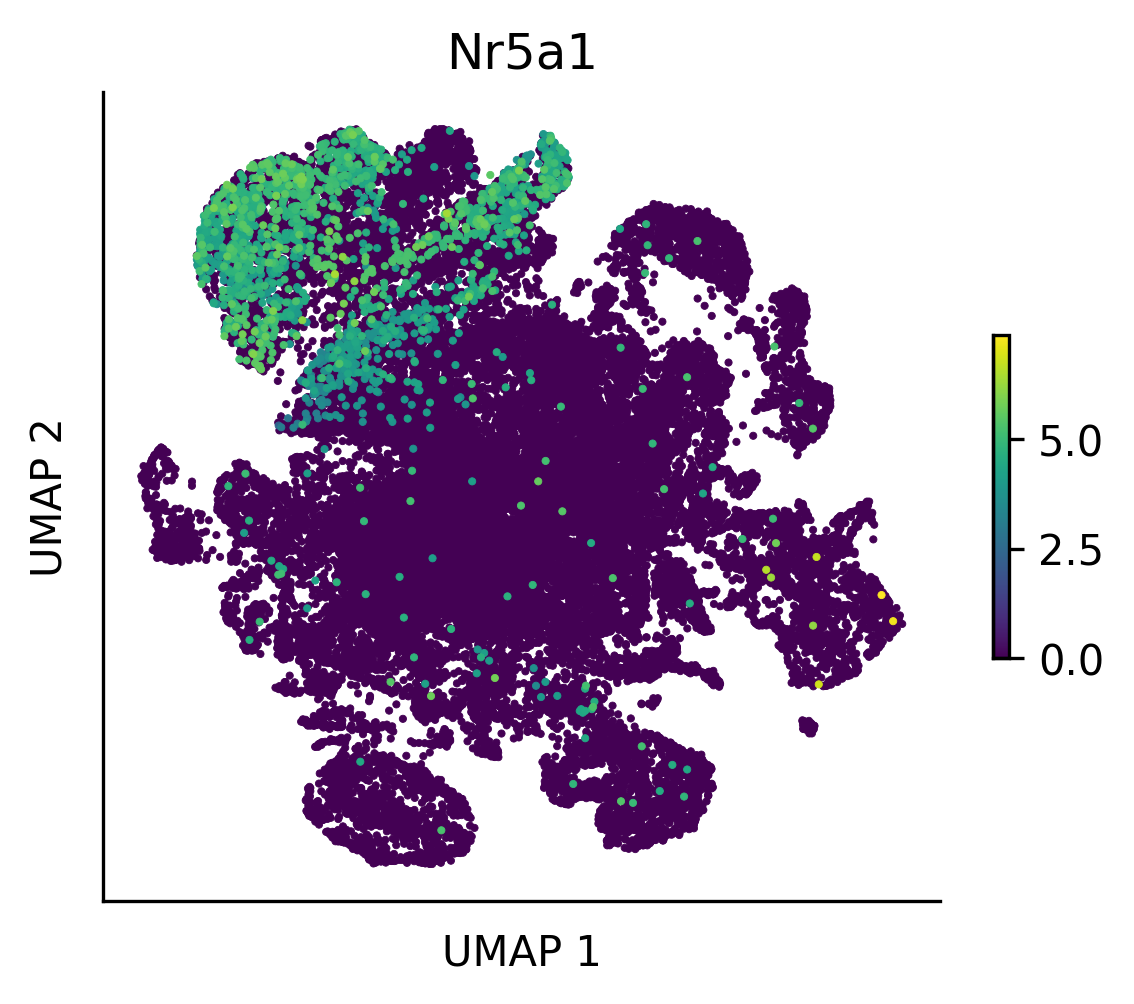

saved: /home/cstansbu/git_repositories/MC3R/analysis/neuron_clusters_key_genes.pdf


<Figure size 1350x1050 with 0 Axes>

In [8]:
label_genes = [
    "Agrp", "Acvr1c", "Adcyap1", "Bdnf", "Cartpt", "Coch", "Crabp1", "Dlk1",
    "Drd2", "Esr1", "Fezf1", "Foxp2", "Gal", "Gabra2", "Gabra5", "Ghrh", "Ghrhr",
    "Grik1", "Grik3", "Gnrh1", "Gnrhr", "Glp1r", "Lepr", "Mc3r", "Mc4r",
    "Mt2", "Nr5a1", "Nfib", "Nts", "Otp", "Oxtr", "Pak3", "Plk2", "Pnoc", "Pomc",
    "Ptk2b", "Rprm", "Sst", "Syndig1", "Tac1", "Tac2", "Trh"
]


images = []

for gene in label_genes:

    plt.rcParams['figure.dpi'] = 300
    plt.rcParams['figure.figsize'] = 4.5, 3.5
    p = ut.plot_umap_scatter(pdf,  x='NU1', y='NU2',
                             color=gene, s=3, alpha=1.0, 
                             linewidths=0.2)
    fig = plt.gcf()
    img = ut.fig2img(fig)
    images.append(img)

    if gene in ['Agrp', 'Nr5a1']:
        plt.show()
    plt.clf()
    # break

outpath = f"/home/cstansbu/git_repositories/MC3R/analysis/neuron_clusters_key_genes.pdf"

images[0].save(
    outpath, 
    "PDF" ,
    resolution=100.0, 
    save_all=True, 
    append_images=images[1:]
)

print(f"saved: {outpath}") 

In [9]:
# load neuropeptides
pep_path = "/nfs/turbo/umms-indikar/shared/projects/MC3R/neuropeptides/group-1902.csv"
ndf = pd.read_csv(pep_path, skiprows=1)

neuropeptides = ndf['Approved symbol'].unique()
neuropeptides = [x.lower().capitalize() for x in neuropeptides]
neuropeptides = [x for x in neuropeptides if x in pdf.var.index.to_list()]

print(f"{len(neuropeptides)=}")

for gene in neuropeptides:

    plt.rcParams['figure.dpi'] = 300
    plt.rcParams['figure.figsize'] = 5, 3.5
    p = ut.plot_umap_scatter(pdf,  x='NU1', y='NU2',
                             color=gene, s=3, 
                             linewidths=0.2,
                            )
    fig = plt.gcf()
    img = ut.fig2img(fig)
    images.append(img)
    # plt.show()
    plt.clf()
    # break

outpath = f"/home/cstansbu/git_repositories/MC3R/analysis/neuron_clusters_key_genes.pdf"

images[0].save(
    outpath, 
    "PDF" ,
    resolution=100.0, 
    save_all=True, 
    append_images=images[1:]
)

print(f"saved: {outpath}") 



len(neuropeptides)=53
saved: /home/cstansbu/git_repositories/MC3R/analysis/neuron_clusters_key_genes.pdf


<Figure size 1500x1050 with 0 Axes>

# DEG

In [10]:
key = 'neuron_cluster_name'
# get marker genes
sc.tl.rank_genes_groups(pdf, 
                        groupby=key,
                        method='wilcoxon',
                        key_added=key,
                        corr_method='benjamini-hochberg')

deg = sc.get.rank_genes_groups_df(pdf, 
                                  group=None,
                                  key=key)

deg.head()

ranking genes
    finished: added to `.uns['neuron_cluster_name']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:02:52)


,group,names,scores,logfoldchanges,pvals,pvals_adj
0,C1,Lrfn5,68.244690,1.964643,0.0,0.0
1,C1,Htr2c,63.353905,3.948962,0.0,0.0
2,C1,Cntnap2,60.747669,1.255993,0.0,0.0
3,C1,Elavl2,60.511353,2.924258,0.0,0.0
4,C1,Egfem1,60.422504,3.249987,0.0,0.0


In [11]:
n_genes = 25
foldchange_threshold = 1.5
alpha = 0.01

genes = ut.get_top_genes(deg, n_genes=n_genes, 
                      lft=foldchange_threshold, 
                      alpha=alpha)


images = []
for idx, row in genes.iterrows():
    gene_list = row['genes']
    cell_type = row['cluster']

    for gene in gene_list.split(","):
        gene = gene.strip()
        plt.rcParams['figure.dpi'] = 300
        plt.rcParams['figure.figsize'] = 5, 3.5
        
        p = ut.plot_umap_scatter(pdf, x='NU1', y='NU2', 
                                 color=gene, s=3, 
                                 linewidths=0.2)
        
        title = f"{cell_type} {gene}"
        plt.title(title)
        # plt.show()
        fig = plt.gcf()
        img = ut.fig2img(fig)
        images.append(img)
        plt.clf()

outpath = f"/home/cstansbu/git_repositories/MC3R/analysis/neuron_clusters_deg_genes.pdf"

images[0].save(
    outpath, 
    "PDF" ,
    resolution=100.0, 
    save_all=True, 
    append_images=images[1:]
)

print(f"saved: {outpath}") 

saved: /home/cstansbu/git_repositories/MC3R/analysis/neuron_clusters_deg_genes.pdf


<Figure size 1500x1050 with 0 Axes>

# Neuropeptide DEG

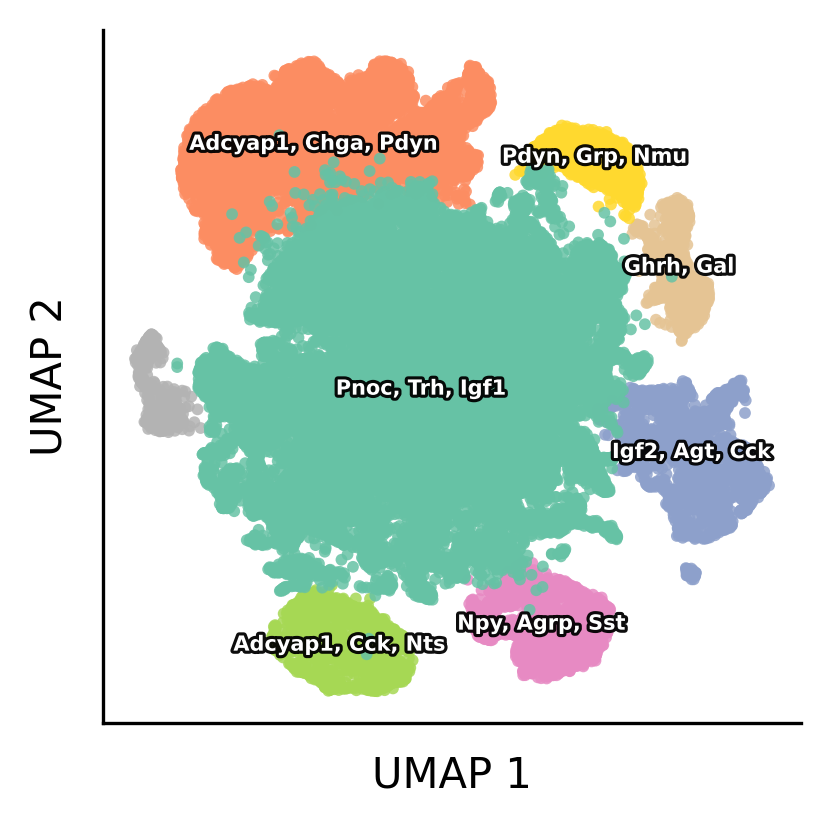

In [29]:
reload(ut)

top_genes = ut.get_top_genes(deg, 
                             neuropeptides, 
                             n_genes=3, 
                             lft=0.5, 
                             alpha=0.05,
                            )

plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 3, 3

ut.plot_umap_with_labels(pdf, top_genes,
                      hue_column='neuron_cluster_name',
                      color_map="Set2", 
                      title="")

plt.yticks([])
plt.xticks([])
plt.ylabel("UMAP 2")
plt.xlabel("UMAP 1")
sns.despine()

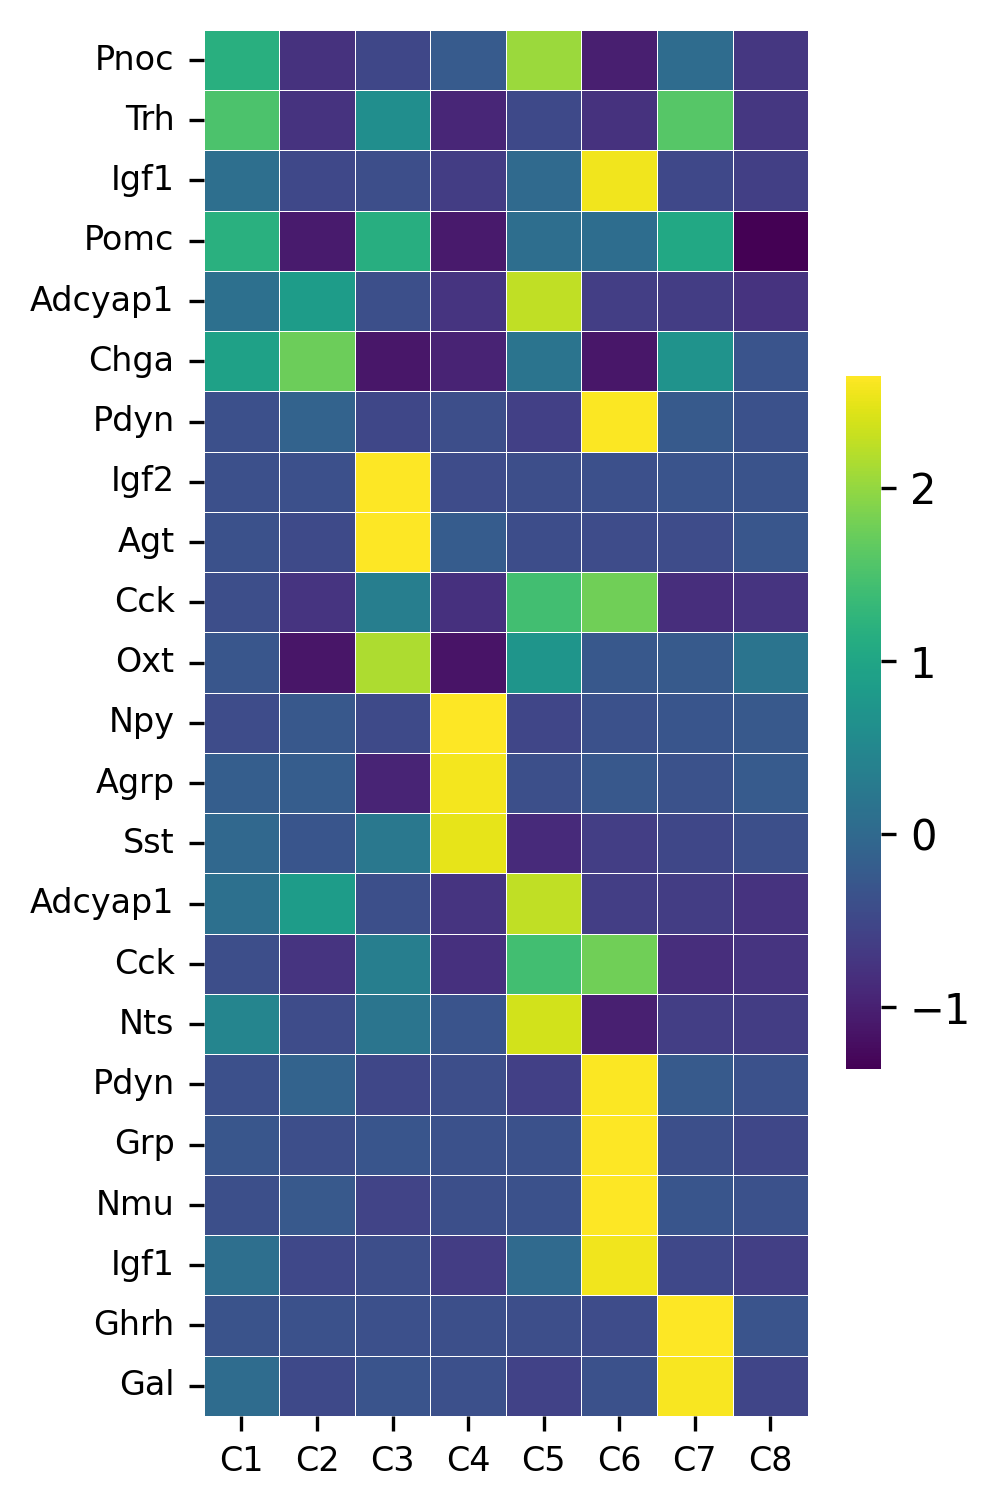

In [94]:
reload(ut)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 3.25, 6

top_genes = ut.get_top_genes(deg, 
                             neuropeptides, 
                             n_genes=4, 
                             lft=0.5, 
                             alpha=0.05,
                            )

ut.plot_top_gene_heatmap(pdf, top_genes, fontsize=8,)

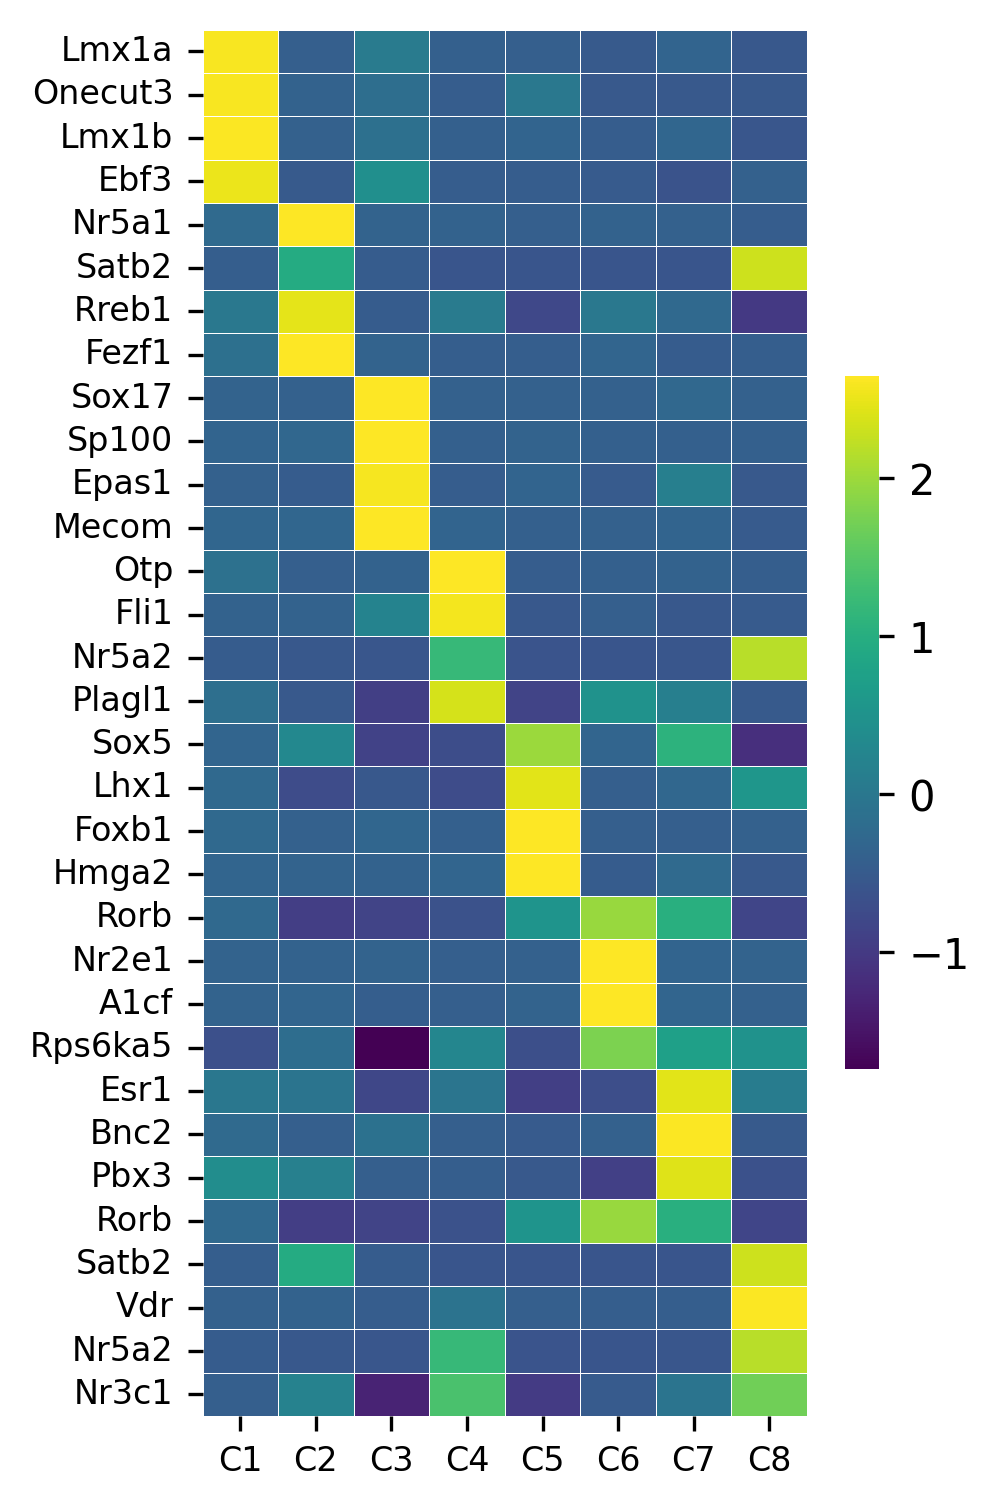

In [93]:
reload(ut)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 3.25, 6

top_genes = ut.get_top_genes(deg, 
                             tf['TF'].to_list(), 
                             n_genes=4, 
                             lft=0.5, 
                             alpha=0.05,
                            )

ut.plot_top_gene_heatmap(pdf, top_genes, fontsize=8,)

# cluster naming

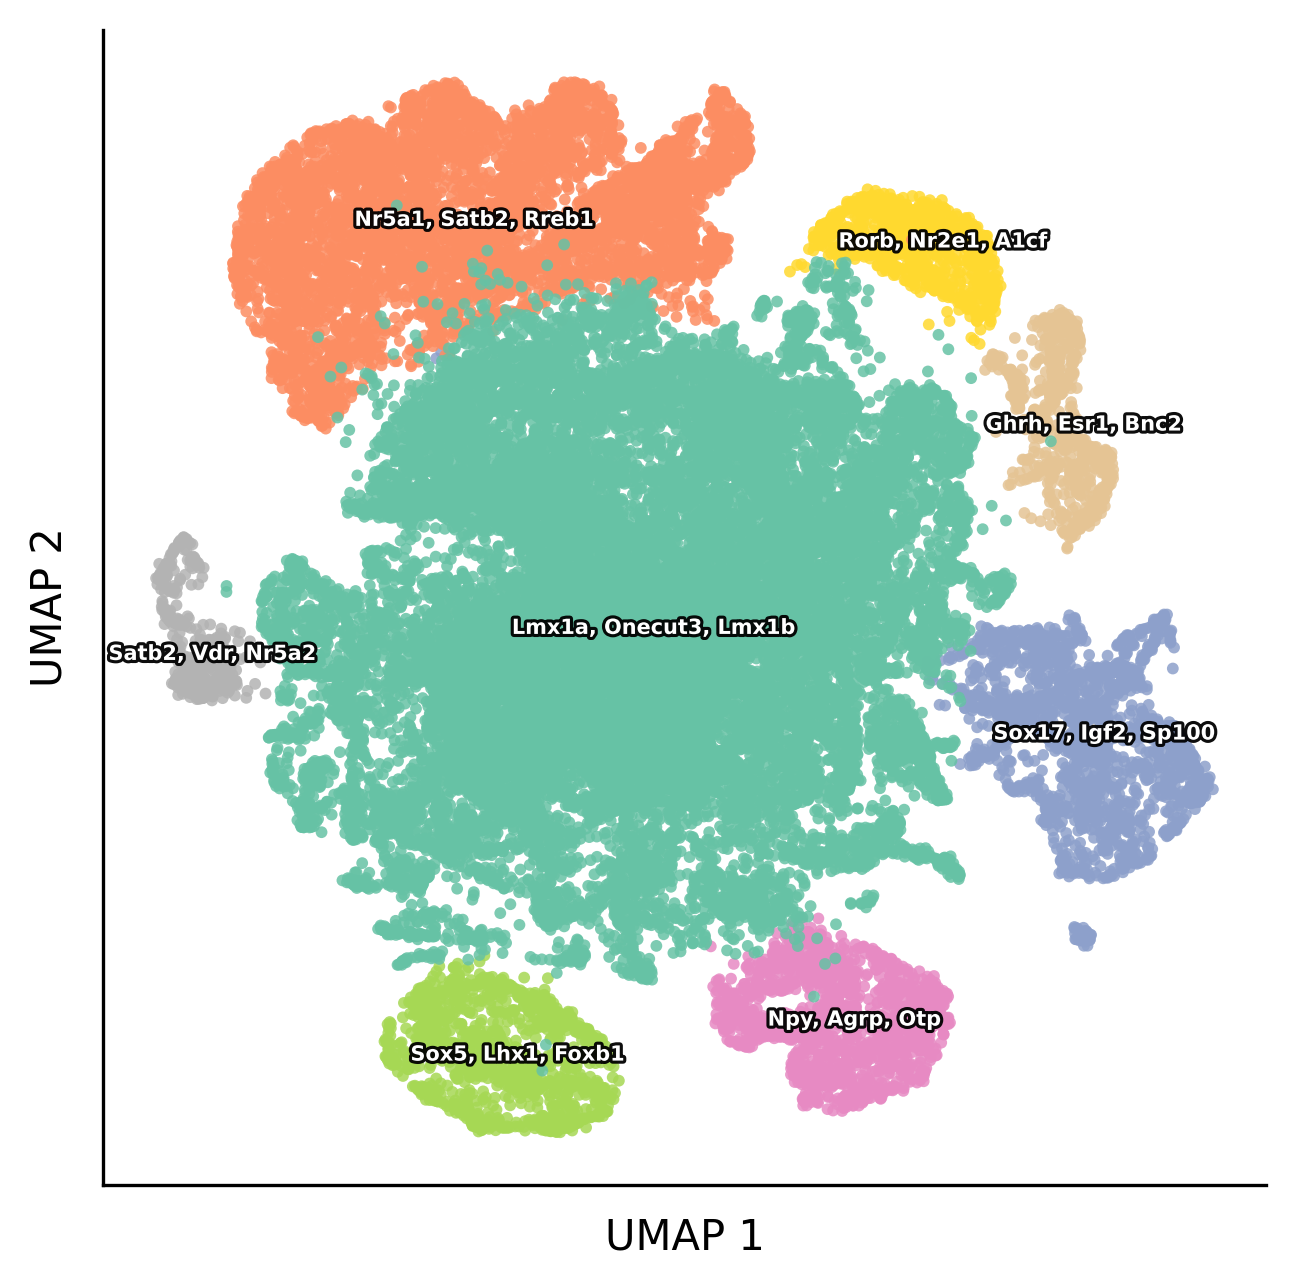

In [108]:
# cluster marking
reload(ut)

label_genes = neuropeptides + tf['TF'].to_list()
label_genes = list(set(label_genes))

top_genes = ut.get_top_genes(deg, 
                             label_genes, 
                             n_genes=3, 
                             lft=0.5, 
                             alpha=0.05,
                            )

plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 5, 5

ut.plot_umap_with_labels(pdf, top_genes,
                      hue_column='neuron_cluster_name',
                      color_map="Set2", 
                      title="", label_pad=1.25)

plt.yticks([])
plt.xticks([])
plt.ylabel("UMAP 2")
plt.xlabel("UMAP 1")
sns.despine()

In [40]:
pdf.obs['neuron_cluster_name'].unique()

['C1', 'C3', 'C6', 'C5', 'C4', 'C2', 'C7', 'C8']
Categories (8, object): ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8']

In [39]:
pdf.obs.columns

Index(['batch', 'reference_embedding_C7_named',
       'reference_embedding_C25_named', 'C25_named', 'C7_named',
       'reference_embedding_C7_named_clean',
       'reference_embedding_C25_named_clean', 'C25_named_clean',
       'C7_named_clean', 'UMAP1', 'UMAP2', 'Diet', 'Sex', 'broad_type',
       'n_genes', 'color', 'leiden', 'cluster_num', 'Cluster', 'cluster_cat',
       'U1', 'U2', 'cell_type', 'neuron_clusters', 'neuron_cluster_num',
       'neuron_cluster_name', 'neuron_cluster_cat', 'NU1', 'NU2'],
      dtype='object')

# TF DEG

In [30]:
# load mouse TFs
tf_path = "/nfs/turbo/umms-indikar/shared/projects/DGC/data/scenic/tf_lists/allTFs_mm.txt"
tf = pd.read_csv(tf_path, header=None, names=['TF'])
print(f"{tf.shape=}")
tf.head()

tf.shape=(1860, 1)


,TF
0,Bcl6b
1,Zscan26
2,Mtf1
3,Klf9
4,Zic5


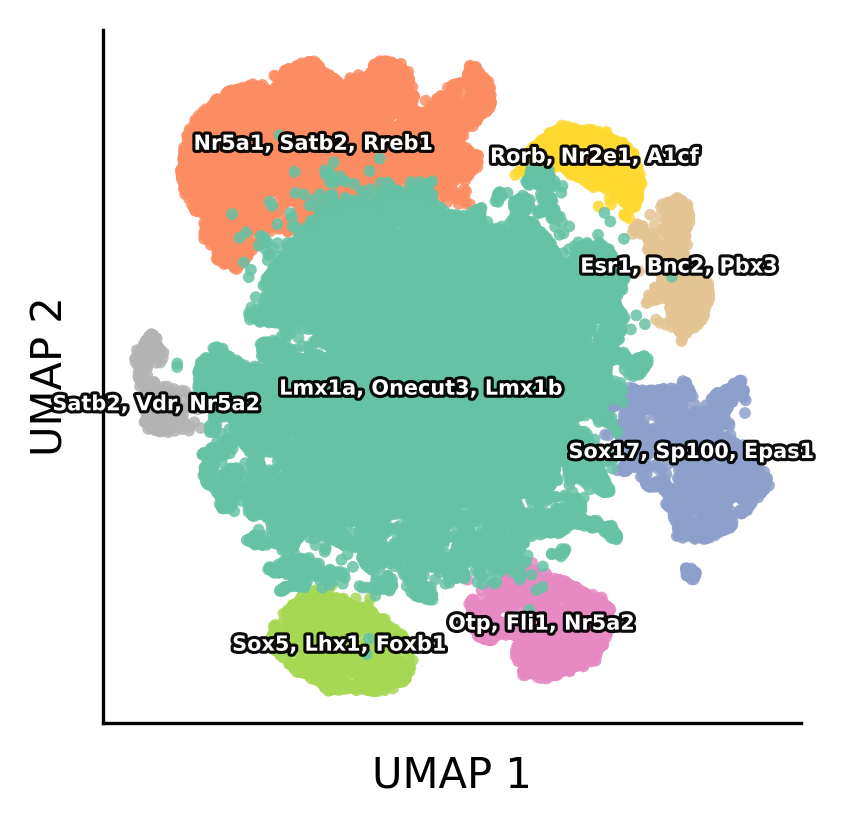

In [31]:
reload(ut)

top_genes = ut.get_top_genes(deg, 
                             tf['TF'].to_list(), 
                             n_genes=3, 
                             lft=0.5, 
                             alpha=0.05,
                            )

plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 3, 3

ut.plot_umap_with_labels(pdf, top_genes,
                      hue_column='neuron_cluster_name',
                      color_map="Set2", 
                      title="")

plt.yticks([])
plt.xticks([])
plt.ylabel("UMAP 2")
plt.xlabel("UMAP 1")
sns.despine()

In [12]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

# TF Expression

In [ ]:
# load mouse TFs
tf_path = "/nfs/turbo/umms-indikar/shared/projects/DGC/data/scenic/tf_lists/allTFs_mm.txt"
tf = pd.read_csv(tf_path, header=None, names=['TF'])
print(f"{tf.shape=}")
tf.head()

In [ ]:
break

In [ ]:
ut.plot_umap_scatter(pdf, x='NU1', y='NU2', color='Agrp')

In [ ]:
break

In [ ]:
def plot_genes(pdf, gene_list, plot_shape=(3, 3), fig_shape=(5, 5)):
    """A function to plot gene expression from a list of query 
    genes"""

    plt.rcParams['figure.dpi'] = 300
    plt.rcParams['figure.figsize'] = fig_shape
    fig, axs = plt.subplots(plot_shape[0], plot_shape[1])
    axs = axs.ravel()

    for i, g in enumerate(gene_list):
        v = pdf[:, [g]].X.todense()
    
        gdf = pdf.obs.copy()
        gdf['exp'] = np.ravel(v)
    
        order = np.argsort(gdf['exp'])
    
        axs[i].scatter(gdf['NU1'][order], 
                       gdf['NU2'][order],
                       c=gdf['exp'][order],
                       s=1,
                       alpha=0.9,
                       ec='none')
        
        axs[i].set_title(g)
        axs[i].set_xticks([])
        axs[i].set_yticks([])
        axs[i].set_xlabel("")
        axs[i].set_ylabel("")

    sns.despine()
    plt.tight_layout()

gene_list = [
    'Npy',
    'Agrp',
    'Otp',
    'Lepr',
    'Ghr',
    'Acvr1c',
    'Nr5a2',
    'Corin',
    'Slco1a1'
]

plot_genes(pdf, gene_list, plot_shape=(3, 3))

outpath = "/nfs/turbo/umms-indikar/shared/projects/MC3R/analysis_files/figures/key_genes_neuron_umap.png"
plt.savefig(outpath)
print(f"saved: {outpath}")

In [ ]:
gene_list = [
    'Nr5a1', 
    'Gpr149', 
    'Fezf1',
    'Dlk1', 
    'Rprm',
    'Lepr',
    'Nfib', 
    'Foxp2',
    'Esr1'
]

plot_genes(pdf, gene_list, plot_shape=(3, 3))
outpath = "/nfs/turbo/umms-indikar/shared/projects/MC3R/analysis_files/figures/key_genes2_neuron_umap.png"
plt.savefig(outpath)
print(f"saved: {outpath}")

In [ ]:
arcuate = [
    'Agrp',
    'Npy',
    'Sst',
    'Ghrh',
    'Th',
    'Kiss1',
    'Tac2',
    'Pdyn',
    'Cartpt',
    'Pomc',
    'Esr1',
]

print(f"{len(arcuate)=}")
plot_genes(pdf, arcuate, plot_shape=(3, 4), fig_shape=(7, 5))

outpath = "/nfs/turbo/umms-indikar/shared/projects/MC3R/analysis_files/figures/arcuate_markers_neuron_umap.png"
plt.savefig(outpath)
print(f"saved: {outpath}")

In [ ]:
vmh = [
    'Nr5a1',
    'Gpr149',
    'Fezf1',
    'Dlk1',
    'Rprm',
    'Lepr',
    'Nfib',
    'Foxp2',
    'Esr1',
]

print(f"{len(vmh)=}")
plot_genes(pdf, vmh, plot_shape=(3, 3), fig_shape=(5, 5))

outpath = "/nfs/turbo/umms-indikar/shared/projects/MC3R/analysis_files/figures/vmh_markers_neuron_umap.png"
plt.savefig(outpath)
print(f"saved: {outpath}")

In [ ]:
def get_summary(cdf, agg_funcs=['mean', 'std','median', 'count',]):
    """A function to get summaries for a query"""
    # get non-zero counts
    nonzero = pd.DataFrame(cdf.apply(np.count_nonzero, axis=0), 
                       columns=['nonzero'])
    
    # get aggregate stats
    cdf = cdf.agg(agg_funcs, axis=0).T
    
    cdf = pd.merge(cdf, 
               nonzero, 
               how='left', 
               left_index=True, 
               right_index=True)
    cdf['pct_expressing'] = cdf['nonzero'] / cdf['count']
    return cdf
    
def make_cluster_data(pdf, gene_list, 
                      agg_funcs=['mean', 'std','median', 'count',],
                      n_bins=3,
                      bin_labels=['low', 'med', 'high']):
    """A function to retrieve stats on a gene list from
    each cluster """

    res = []
    for cluster, group in pdf.obs.groupby('neuron_cluster_name'):
    
        cell_idx = group.index
        gene_idx = gene_list
    
        cdf = pdf[cell_idx, gene_idx].to_df()
        cdf = get_summary(cdf, agg_funcs)
        
        cdf['cluster'] = cluster
    
        cdf['expression_bin'] = pd.cut(cdf['mean'], n_bins, labels=bin_labels)
        cdf['pct_bin'] = pd.cut(cdf['pct_expressing'], n_bins, labels=bin_labels)
        cdf = cdf.reset_index(drop=False)
    
        res.append(cdf)
    
    res = pd.concat(res)
    return res
                          
def plot_cluster_average_expression(pdf, 
                                    gene_list, 
                                    all_pos,
                                    cmap='RdYlGn',
                                    plot_shape=(3, 3), 
                                    fig_shape=(5, 5),
                                    scale_bars=False):

    res = []                                        
    for cluster, group in pdf.obs.groupby('neuron_cluster_name'):
        cell_idx = group.index
        cdf = pdf[cell_idx, gene_list].to_df()

        cdf = get_summary(cdf, agg_funcs=['mean', 'count'])
        cdf['cluster'] = cluster
        res.append(cdf)
    res = pd.concat(res)
    res = res.reset_index(drop=False)                                      
    res = pd.pivot_table(res, 
                         index='cluster',
                         columns='index',
                         values='mean',
                        )                                  
   
    pdx = pdf.obs.copy()    
    pdx = pd.merge(pdx, res,
                   how='left',
                   left_on='neuron_cluster_name',
                   right_on='cluster')
                              
    plt.rcParams['figure.dpi'] = 300
    plt.rcParams['figure.figsize'] = fig_shape
    fig, axs = plt.subplots(plot_shape[0], plot_shape[1])
    axs = axs.ravel()

    for i, g in enumerate(gene_list):
        order = np.argsort(pdx[g])
        p = axs[i].scatter(pdx['NU1'][order], 
                       pdx['NU2'][order],
                       c=pdx[g][order],
                       s=1,
                       cmap=cmap,
                       alpha=0.9,
                       ec='none')

        if scale_bars:
             plt.colorbar(p, ax=ax[i, j])
        
        axs[i].set_title(g)
        axs[i].set_xticks([])
        axs[i].set_yticks([])
        axs[i].set_xlabel("")
        axs[i].set_ylabel("")

        for label, x_pos, y_pos in all_pos.itertuples():
            axs[i].text(
                x_pos,
                y_pos,
                label,
                weight='bold',
                color='w',
                path_effects=[pe.withStroke(linewidth=1.5, foreground="k", alpha=0.95,)],
                verticalalignment="center",
                horizontalalignment="center",
                fontsize='5',
            )
    plt.tight_layout()

In [ ]:
# load neuropeptides
pep_path = "/nfs/turbo/umms-indikar/shared/projects/MC3R/neuropeptides/group-1902.csv"
ndf = pd.read_csv(pep_path, skiprows=1)

neuropeptides = ndf['Approved symbol'].unique()
neuropeptides = [x.lower().capitalize() for x in neuropeptides]
neuropeptides = [x for x in neuropeptides if x in pdf.var.index.to_list()]

print(f"{len(neuropeptides)=}")

chunks = np.array_split(neuropeptides, 5)

for i, neps in enumerate(chunks):
    plot_cluster_average_expression(pdf, 
                                    neps,
                                    all_pos,
                                    cmap='plasma',
                                    plot_shape=(3, 4), 
                                    fig_shape=(8, 6))
    outpath = f"/nfs/turbo/umms-indikar/shared/projects/MC3R/analysis_files/figures/neuropeptide_neuron_umap_{i+1}.png"
    plt.savefig(outpath)
    print(f"saved: {outpath}")

    

# DEG analysis

In [ ]:
key = 'neuron_cluster_name'
# get marker genes
sc.tl.rank_genes_groups(pdf, 
                        groupby=key,
                        method='wilcoxon',
                        key_added=key,
                        corr_method='benjamini-hochberg')

deg = sc.get.rank_genes_groups_df(pdf, 
                                  group=None,
                                  key=key)

deg.head()

In [ ]:
def get_top_genes(deg, n_genes=3, lft=1.5, alpha=0.01):
    """A function to get the top deg from
    each cluster"""
    
    sig = deg[deg['logfoldchanges'] > lft]
    sig = sig[sig['pvals_adj'] <= alpha]

    # filter out predicted genes
    sig = sig[~sig['names'].str.startswith("Gm")]
    sig = sig[~sig['names'].str.endswith("Rik")]
    
    sig = sig.sort_values(by=['group', 'logfoldchanges'], ascending=[False, False])

    res = []

    for cluster, group in sig.groupby('group'):
        group = group.head(n_genes)
        genes = ", ".join(group['names'].to_list())
        row = {
            'cluster' : cluster,
            'genes' : genes,
        }
        res.append(row)
    res = pd.DataFrame(res)
    return res

top_genes = get_top_genes(deg, n_genes=3, lft=1.5, alpha=0.01)
top_genes

In [ ]:
color_map = "nipy_spectral"

""" UMAP PLOT """
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 5, 5

# sort the data frame
pdx = pdf.obs.copy()
pdx = pdx.sort_values(by='cell_type')
pdx = pdx.reset_index()

hue_order = sorted(pdx['neuron_cluster_name'].unique())
order = np.argsort(pdx['neuron_cluster_name'])[::-1]

sns.scatterplot(data=pdx.iloc[order],
                x='NU1',
                y='NU2',
                hue='neuron_cluster_name',
                hue_order=hue_order,
                palette='nipy_spectral',
                s=8,
                alpha=0.85,
                ec='none'
        )

sns.despine()
plt.xticks([])
plt.yticks([])

plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")

# label on data
ax = plt.gca()

all_pos = (
        pdx.groupby('neuron_cluster_name')[['NU1', 'NU2']]
        .median()
        .sort_index()
    )

for label, x_pos, y_pos in all_pos.itertuples():
    new_label = top_genes[top_genes['cluster'] == label]['genes'].values[0]
    ax.text(
        x_pos,
        y_pos,
        new_label,
        weight='bold',
        color='w',
        path_effects=[pe.withStroke(linewidth=1.5, foreground="k", alpha=0.95,)],
        verticalalignment="center",
        horizontalalignment="center",
        fontsize='5',
    )

plt.title("Differentially Expressed Genes")
plt.gca().legend().remove()

outpath = f"/nfs/turbo/umms-indikar/shared/projects/MC3R/analysis_files/figures/neuron_DEG_umap.png"
plt.savefig(outpath)
print(f"saved: {outpath}")

In [ ]:
# load mouse TFs
tf_path = "/nfs/turbo/umms-indikar/shared/projects/DGC/data/scenic/tf_lists/allTFs_mm.txt"
tf = pd.read_csv(tf_path, header=None, names=['TF'])
print(f"{tf.shape=}")
tf.head()

In [ ]:
def get_top_TF(deg, tf, n_genes=3, lft=1.5, alpha=0.01):
    """A function to get the top deg transcription factors from
    each cluster"""
    
    sig = deg[deg['logfoldchanges'] > lft]
    sig = sig[sig['pvals_adj'] <= alpha]
    sig = sig[sig['names'].isin(tf['TF'].to_list())]

    # filter out predicted genes
    sig = sig[~sig['names'].str.startswith("Gm")]
    sig = sig[~sig['names'].str.endswith("Rik")]
    
    sig = sig.sort_values(by=['group', 'logfoldchanges'], ascending=[False, False])

    res = []

    for cluster, group in sig.groupby('group'):
        group = group.head(n_genes)
        genes = ", ".join(group['names'].to_list())
        row = {
            'cluster' : cluster,
            'genes' : genes,
        }
        res.append(row)
    res = pd.DataFrame(res)
    return res

top_genes = get_top_TF(deg, tf, n_genes=6, lft=1.0, alpha=0.01)
top_genes

In [ ]:
top_genes = get_top_TF(deg, tf, n_genes=3, lft=1.0, alpha=0.01)

color_map = "nipy_spectral"

""" UMAP PLOT """
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 5, 5

# sort the data frame
pdx = pdf.obs.copy()
pdx = pdx.sort_values(by='cell_type')
pdx = pdx.reset_index()

hue_order = sorted(pdx['neuron_cluster_name'].unique())
order = np.argsort(pdx['neuron_cluster_name'])[::-1]

sns.scatterplot(data=pdx.iloc[order],
                x='NU1',
                y='NU2',
                hue='neuron_cluster_name',
                hue_order=hue_order,
                palette='nipy_spectral',
                s=8,
                alpha=0.85,
                ec='none'
        )

sns.despine()
plt.xticks([])
plt.yticks([])

plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")

# label on data
ax = plt.gca()

all_pos = (
        pdx.groupby('neuron_cluster_name')[['NU1', 'NU2']]
        .median()
        .sort_index()
    )

for label, x_pos, y_pos in all_pos.itertuples():
    new_label = top_genes[top_genes['cluster'] == label]['genes'].values[0]
    ax.text(
        x_pos,
        y_pos,
        new_label,
        weight='bold',
        color='w',
        path_effects=[pe.withStroke(linewidth=1.5, foreground="k", alpha=0.95,)],
        verticalalignment="center",
        horizontalalignment="center",
        fontsize='5',
    )

plt.title("Differentially Expressed TFs")
plt.gca().legend().remove()

outpath = f"/nfs/turbo/umms-indikar/shared/projects/MC3R/analysis_files/figures/neuron_DEG_transcription_factors_umap.png"
plt.savefig(outpath)
print(f"saved: {outpath}")

In [ ]:
def get_top_np(deg, neuropeptides, n_genes=3, lft=1.5, alpha=0.01):
    """A function to get the top deg transcription factors from
    each cluster"""
    
    sig = deg[deg['logfoldchanges'] > lft]
    sig = sig[sig['pvals_adj'] <= alpha]
    sig = sig[sig['names'].isin(neuropeptides)]

    # filter out predicted genes
    sig = sig[~sig['names'].str.startswith("Gm")]
    sig = sig[~sig['names'].str.endswith("Rik")]
    
    sig = sig.sort_values(by=['group', 'logfoldchanges'], ascending=[False, False])

    res = []

    for cluster, group in sig.groupby('group'):
        group = group.head(n_genes)
        genes = ", ".join(group['names'].to_list())
        row = {
            'cluster' : cluster,
            'genes' : genes,
        }
        res.append(row)
    res = pd.DataFrame(res)
    return res

top_genes = get_top_np(deg, neuropeptides, n_genes=6, lft=1.0, alpha=0.01)
top_genes

In [ ]:
top_genes = get_top_np(deg, neuropeptides, n_genes=6, lft=1.0, alpha=0.01)
top_genes

color_map = "nipy_spectral"

""" UMAP PLOT """
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 5, 5

# sort the data frame
pdx = pdf.obs.copy()
pdx = pdx.sort_values(by='cell_type')
pdx = pdx.reset_index()

hue_order = sorted(pdx['neuron_cluster_name'].unique())
order = np.argsort(pdx['neuron_cluster_name'])[::-1]

sns.scatterplot(data=pdx.iloc[order],
                x='NU1',
                y='NU2',
                hue='neuron_cluster_name',
                hue_order=hue_order,
                palette='nipy_spectral',
                s=8,
                alpha=0.85,
                ec='none'
        )

sns.despine()
plt.xticks([])
plt.yticks([])

plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")

# label on data
ax = plt.gca()

all_pos = (
        pdx.groupby('neuron_cluster_name')[['NU1', 'NU2']]
        .median()
        .sort_index()
    )

for label, x_pos, y_pos in all_pos.itertuples():
    new_label = top_genes[top_genes['cluster'] == label]['genes'].values[0]
    ax.text(
        x_pos,
        y_pos,
        new_label,
        weight='bold',
        color='w',
        path_effects=[pe.withStroke(linewidth=1.5, foreground="k", alpha=0.95,)],
        verticalalignment="center",
        horizontalalignment="center",
        fontsize='5',
    )

plt.title("Differentially Expressed Neuropeptides")
plt.gca().legend().remove()

outpath = f"/nfs/turbo/umms-indikar/shared/projects/MC3R/analysis_files/figures/neuron_DEG_neuropeptides_umap.png"
plt.savefig(outpath)
print(f"saved: {outpath}")

# Create summaries

In [ ]:
top_genes = get_top_genes(deg, n_genes=10, lft=1.5, alpha=0.01)
top_genes = get_top_TF(deg, tf, n_genes=3, lft=1.0, alpha=0.01)



# outpath = "/nfs/turbo/umms-indikar/shared/projects/MC3R/analysis_files/neuron_cluster_summary.xlsx"

# export = {
#     'Cells_by_Type' : summary,
#     'Sun1_Mc3r_summary' : res, 
#     'Marker_Gene_Expression' : kdf,
#     'Cells_by_HypoMap' : hypo,
# }
    
# with pd.ExcelWriter(outpath, engine='xlsxwriter') as writer:
#     for k, v in export.items():
#         v.to_excel(writer, sheet_name=k, index=True)

# print(f'saved: {outpath}')